In [1159]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import plotly.offline as pyo
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline


In [1160]:
print(os.getcwd())

C:\Users\deepa\Downloads


In [1161]:
# separate the price column from the rest of the data
X = df.drop('Price', axis=1)
y = df['Price']

In [1162]:
# load your dataset into a pandas DataFrame
df = pd.read_excel('C:\\Users\\deepa\\Downloads\\t.xlsx')
# define the columns containing string values
string_cols = ['Airline', 'Date_of_Journey', 'Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']

# create a LabelEncoder object for each string column
label_encoders = {}
for col in string_cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    label_encoders[col] = le

# save the label encoders for future use
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [1163]:
X

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,233,240,4,8
1,1,6,3,0,84,31,906,336,1,8
2,4,43,2,1,118,70,413,106,1,8
3,3,10,3,0,91,164,1324,311,0,8
4,3,0,0,5,29,149,1237,303,0,8
...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8
10679,1,29,3,0,64,193,1305,237,4,8
10680,4,29,0,2,18,58,824,280,4,8
10681,10,0,0,5,18,92,938,238,4,8


In [1164]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [1165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1166]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [1167]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [1168]:
y_pred = rf.predict(X_test)

In [1169]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 score:", r2)

Mean squared error: 2415641.287413655
RMSE: 1554.2333439395948
MAE: 786.2844852578529
R2 score: 0.8858606519657815


In [1170]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [2, 4, 8, None],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest Classifier object
rfr = RandomForestRegressor()

# Use Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rfr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


# print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score:", test_score)

Best parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}
Best score: 0.8510149719154066
Test score: 0.8812004001924851


In [1171]:
#Let's stick with these parameters for our training model and import our test dataset now.
df2 = pd.read_excel('C:\\Users\\deepa\\Downloads\\v.xlsx')
string_cols = ['Airline', 'Date_of_Journey', 'Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']

# create a LabelEncoder object for each string column
label_encoders = {}
for col in string_cols:
    le = LabelEncoder()
    le.fit(df2[col])
    df2[col] = le.transform(df2[col])
    label_encoders[col] = le

# save the label encoders for future use
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
    

In [1172]:
X_pred=df2

In [1173]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)

In [1174]:
rf.fit(X,y)

RandomForestRegressor(n_estimators=500, random_state=42)

In [1175]:
y_pred=rf.predict(X_pred)

In [1176]:
y_pred

array([ 8171.326     ,  5876.124     ,  9030.5641    , ...,
        8451.422     , 11514.714     ,  9524.09916667])

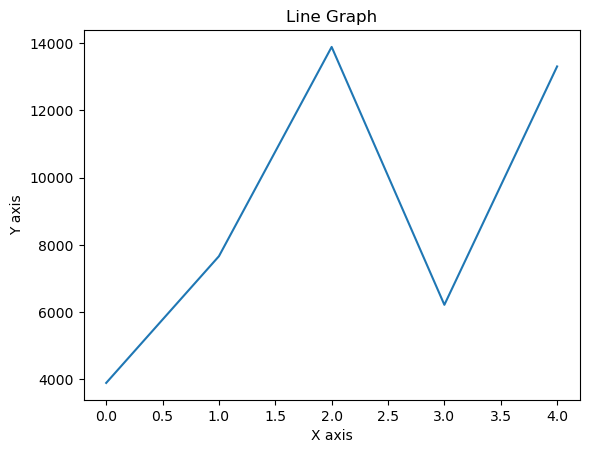

In [1177]:
# x-axis values
x = [0,1,2,3,4]
 
# Y-axis values
y = [3897,7662,13882,6218,13302]
 
# Function to plot

plt.title("Line Graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y)
 
# function to show the plot
plt.show()

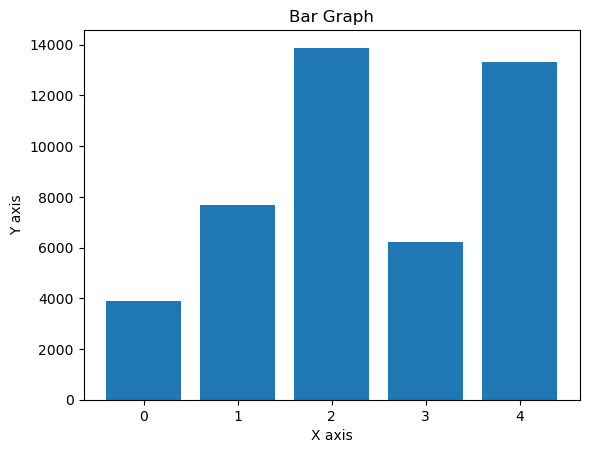

In [1178]:
# x-axis values
x = [0,1,2,3,4]
# Y-axis values
y = [3897,7662,13882,6218,13302]
 
# Function to plot
plt.title("Bar Graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.bar(x, y)
 
# function to show the plot
plt.show()

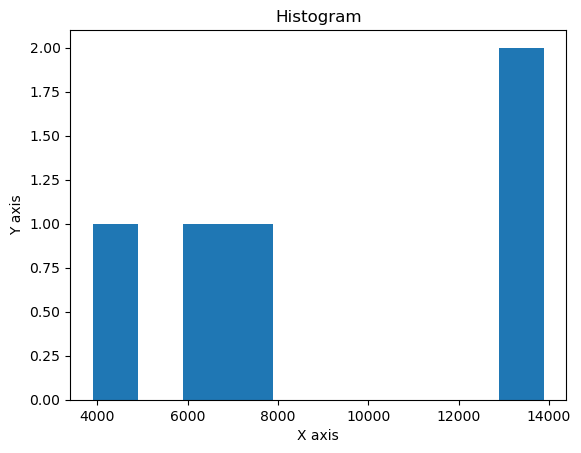

In [1179]:
# Y-axis values
y = [3897,7662,13882,6218,13302]
 
# Function to plot histogram
plt.title("Histogram")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.hist(y)
 
# Function to show the plot
plt.show()

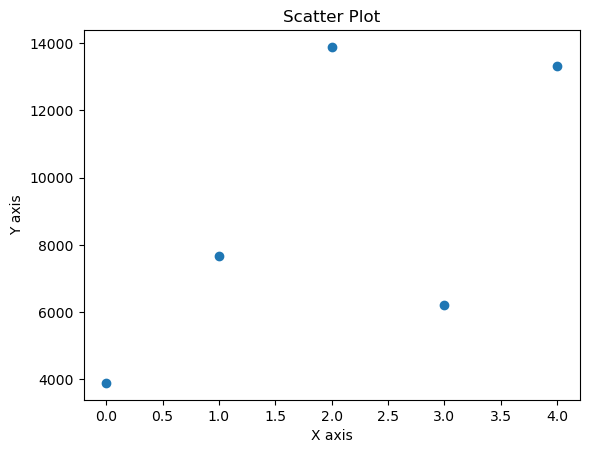

In [1180]:
# x-axis values
x = [0,1,2,3,4]
 
# Y-axis values
y = [3897,7662,13882,6218,13302]
 
# Function to plot scatter
plt.title("Scatter Plot")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.scatter(x, y)
 
# function to show the plot
plt.show()

<AxesSubplot:>

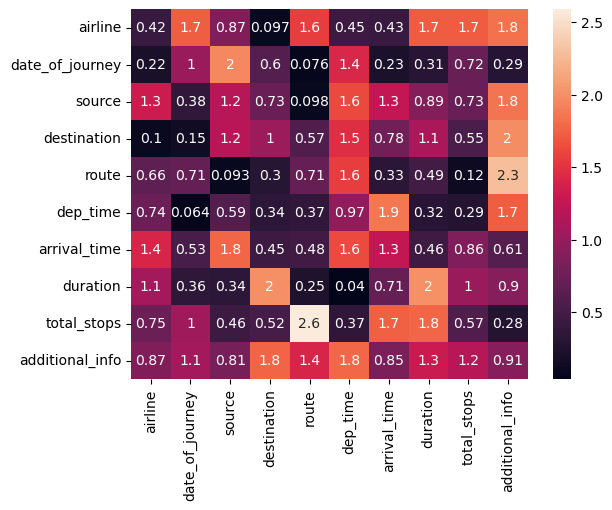

In [1181]:
Index= ['airline', 'date_of_journey', 'source', 'destination', 'route', 'dep_time', 'arrival_time','duration','total_stops','additional_info']
Cols = ['airline', 'date_of_journey', 'source', 'destination', 'route', 'dep_time', 'arrival_time','duration','total_stops','additional_info']
df = DataFrame(abs(np.random.randn(10, 10)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)

In [1182]:
lr= LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [1183]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 score:", r2)


Mean squared error: 30394326.80299485
RMSE: 5513.105005620231
MAE: 3952.2564342536266
R2 score: -0.4361356809508543


In [1184]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [2, 4, 8, None],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest Classifier object
lrl = LogisticRegression()

# Use Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rfr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


# print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score:", test_score)

Best parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}
Best score: 0.8507655498192964
Test score: 0.8790574790378928


In [1185]:
#Let's stick with these parameters for our training model and import our test dataset now.
df2 = pd.read_excel('C:\\Users\\deepa\\Downloads\\v.xlsx')
string_cols = ['Airline', 'Date_of_Journey', 'Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']

# create a LabelEncoder object for each string column
label_encoders = {}
for col in string_cols:
    le = LabelEncoder()
    le.fit(df2[col])
    df2[col] = le.transform(df2[col])
    label_encoders[col] = le

# save the label encoders for future use
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


In [1186]:
X_pred=df2
lr = LogisticRegression(random_state=42)
lr.fit(X,y)
y_pred=lr.predict(X_pred)
y_pred

ValueError: Found input variables with inconsistent numbers of samples: [10683, 5]